# GridSearch SVC 4

Aplicando `GridSearchCV` em `SVC` para obter melhor valor do parâmetro `C` utilizando o `gamma` encontrado no `GridSearchCV` anterior.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

## Carregando dados

In [2]:
# Carregando DataFrame
chainDF = pd.read_csv('./corrente.csv')

targetS = chainDF.pop('classe')

# Carregando Rótulos das características
feature_names = chainDF.columns

# Carregando rótulos das classes
target_names = ['Normal', 'HI-1', 'HI-2', 'HI-3', 'LI-1', 'LI-2', 'LI-3']

# Definindo variáveis
X, y = chainDF.to_numpy(), targetS.to_numpy()

# Separando dados
X_pre_train, X_pre_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pré-processando dados
sc = StandardScaler().fit(X_pre_train)

X_train = sc.transform(X_pre_train)
X_test = sc.transform(X_pre_test)

## Realizando `GridSearchCV`

In [6]:
cGS = GridSearchCV(
    estimator=SVC(),
    cv=15,
    param_grid={
        'C':np.linspace(1, 50),
        'gamma':[0.5],
        'decision_function_shape':['ovo'],
        'cache_size':[1000]}
).fit(
    X_train,
    y_train
)

cDF = pd.DataFrame(cGS.cv_results_)
cDF[['param_C', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

,param_C,mean_test_score,std_test_score,rank_test_score
24,25,0.721701,0.019310,1
25,26,0.721518,0.019281,2
23,24,0.721518,0.019281,2
22,23,0.721518,0.019281,2
21,22,0.720969,0.018821,5
20,21,0.720969,0.018821,5
19,20,0.720969,0.018821,5
18,19,0.720969,0.019328,8
7,8,0.720787,0.017985,9
27,28,0.720786,0.019450,10


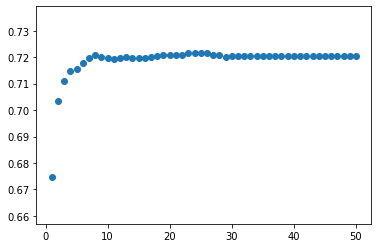

In [7]:
plt.scatter(x=cDF[['param_C']], y=cDF[['mean_test_score']])